### Values

In [8]:
ITERATIONS = 20
TEST_SIZE = 0.3
FEATURES = ['other_units_assigned_quantity', 'alarm_box_number', 'ladders_assigned_quantity', 'engines_assigned_quantity']
TARGET_ATTRIBUTE = 'other_units_assigned_quantity'

### Read Json and validate Data

In [9]:
import pandas as pd

df = pd.read_json('/Users/loic.doerr/dev/berlin-emergency-ai/data/fire-incidents/interims.json')
df.dropna(inplace=True)

### Train Models

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

features = df[FEATURES]
target = df[TARGET_ATTRIBUTE]

features = pd.get_dummies(features)

models = []
errors = []

for iteration in range(ITERATIONS):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=iteration) 
  model = LinearRegression()
  model.fit(features_train, target_train)
  target_pred = model.predict(features_test)
  mse = metrics.mean_squared_error(target_test, target_pred)
  models.append(model)
  errors.append(mse)

print('Errors', errors)

Errors [3.026463963134361e-26, 2.048570387045256e-27, 1.9148895179382537e-26, 1.2475064951433109e-26, 7.892828273904894e-26, 6.564290125987671e-29, 2.0258160643581353e-25, 1.9388831684611834e-26, 5.127431108199877e-26, 3.5462143153142163e-26, 2.200265857534775e-26, 5.222362696396671e-26, 1.3568883119226622e-25, 1.0296920553175696e-22, 7.872074124887896e-26, 3.575722678286202e-26, 9.125508154199815e-26, 4.1503847888079046e-26, 3.34342195050033e-26, 2.5288771774193672e-26]


### Plot Models

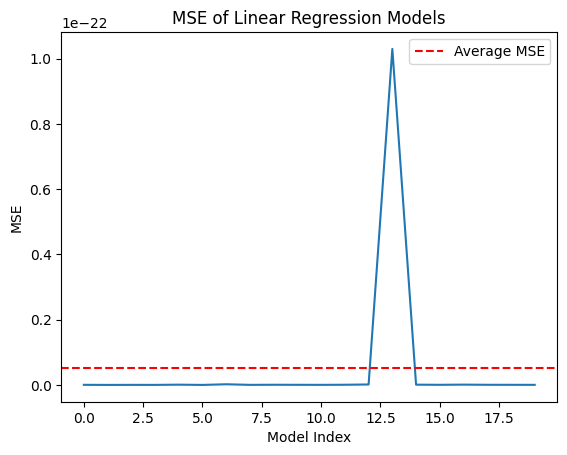

In [11]:
import matplotlib.pyplot as plt
import numpy as np

average_error = np.mean(errors)

plt.plot(errors)
plt.axhline(average_error, color='r', linestyle='--', label='Average MSE')
plt.xlabel('Model Index')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Models')
plt.legend()
plt.show()

### Get Best Model

In [12]:
best_model_index = errors.index(min(errors))
best_model = models[best_model_index]

print('Best Model MSE', errors[best_model_index])

Best Model MSE 6.564290125987671e-29


### Save Model

In [13]:
import joblib

joblib.dump(best_model, f'../models/model.pkl')

categories = {col: list(features[col].unique()) for col in features.columns}
joblib.dump(categories, f'../models/categories.pkl')

['../models/categories.pkl']

### Get Feature Importances

Higher = more Important

In [14]:
feature_names = features.columns

feature_importances = best_model.coef_

feature_dict = dict(zip(feature_names, feature_importances))

for feature, importance in feature_dict.items():
  print(f'Feature: {feature}, Importance: {importance}')

Feature: other_units_assigned_quantity, Importance: 0.9999999999999971
Feature: alarm_box_number, Importance: -3.3936339255480925e-18
Feature: ladders_assigned_quantity, Importance: 1.5614402603977843e-16
Feature: engines_assigned_quantity, Importance: 2.741912764770567e-16
